In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
trainfile=pd.read_csv("../KNN/train (copy).csv")
x=trainfile.values
print(x.shape)
trainfile.head()

(19999, 785)


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.670,0.671,0.672,0.673,0.674,0.675,0.676,0.677,0.678,7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [16]:
# divide data into training and testing data
x_train=x[:14000,:-1]
y_train=x[:14000,-1]
x_test=x[14000:,:-1]
y_test=x[14000:,-1]
m=x_train.shape[0]
n=x_train.shape[1]
print(x_train.shape,y_train.shape,m,n,x_test.shape,y_test.shape)
print(np.unique(y_train,return_counts=True))


(14000, 784) (14000,) 14000 784 (5999, 784) (5999,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1412, 1422, 1411, 1393, 1401, 1402, 1380, 1390, 1372, 1417]))


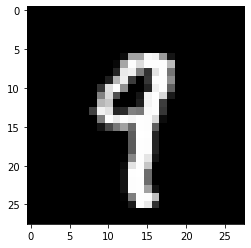

In [17]:
def drawimg(x):
    img=x.reshape((28,28))
    plt.imshow(img,cmap='gray')
    
drawimg(x_train[1200])
    

In [18]:
def dist(x1,x2):
    return np.sqrt(((x1-x2)**2).sum())

def knn(x,y,query_point,k=10):
    dist_list=[]
    
    for i in range(m):
        d=dist(query_point,x[i])
        dist_list.append((d,y_train[i]))
    
    dist_list=sorted(dist_list)
    dist_list=dist_list[:k]
    
    val=np.array(dist_list)
    t=np.unique(val[:,1],return_counts=True)
    index=t[1].argmax()
    pred=t[0][index]
    return pred

In [19]:
query_x=x_test[0]
query_y=y_test[0]
prediction=knn(x_train,y_train,query_x)

6
6


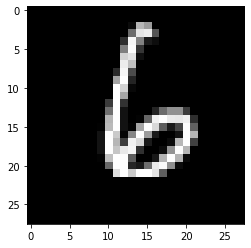

In [20]:
print(int(prediction))
drawimg(query_x)
print(query_y)

In [21]:
cnt = 0
for i in range(100):
    pred = knn(x_train,y_train,x_test[i])
    if(int(pred)==y_test[i]):
        cnt +=1
        
print(cnt/100)

0.92
